# Sentiment Analysis Pipeline
Notebook n√†y th·ª±c hi·ªán to√†n b·ªô quy tr√¨nh t·ª´ x·ª≠ l√Ω d·ªØ li·ªáu th√¥ ƒë·∫øn training v√† ƒë√°nh gi√° model

In [1]:
import sys
import os

# Add project root to path
project_root = os.path.dirname(os.getcwd())
sys.path.append(project_root)

# Import c√°c module c·∫ßn thi·∫øt
from src.config import Config
from src.data.data_loader import DataLoader
from src.data.preprocessor import DataPreprocessor 
from src.features.feature_engineering import FeatureExtractor
from src.models.model_trainer import EnhancedModelTrainer
from src.models.model_predictor import SentimentPredictor
from src.utils.evaluation import ModelEvaluator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## 1. C·∫•u h√¨nh v√† Kh·ªüi t·∫°o

In [2]:
# Kh·ªüi t·∫°o config
config = Config()

# Ch·ªçn ng√¥n ng·ªØ
language = 'vi'  # ho·∫∑c 'en'

# Kh·ªüi t·∫°o c√°c component
data_loader = DataLoader(config)
preprocessor = DataPreprocessor(language, config)
feature_extractor = FeatureExtractor(language, config)
model_trainer = EnhancedModelTrainer(language, config)
evaluator = ModelEvaluator(language)

Loaded feature extractor with None dimensions


## 2. Load v√† X·ª≠ l√Ω D·ªØ li·ªáu

In [3]:
# Load raw data
file_path = os.path.join(config.DATA_DIR, 'raw', f'{language}_social_media.csv')
df = data_loader.load_data(file_path)

# Hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n
print("Dataset Info:")
print(f"Total samples: {len(df)}")
print("\nClass distribution:")

# checking if labels is exists in the dataset
if 'label' in df.columns:
    print(df['label'].value_counts())
else:
    print("No label column found in the dataset")

# Preprocess data
processed_df = preprocessor.preprocess(df)

# Save processed data to file
processed_data_path = os.path.join(config.DATA_DIR, 'processed', f'{language}_processed.csv')
preprocessor.save_processed_data(processed_df, processed_data_path)

# Split data
train_df, test_df = data_loader.split_data(processed_df)

# Get features and labels
X_train, y_train = data_loader.get_features_and_labels(train_df)
X_test, y_test = data_loader.get_features_and_labels(test_df)

Dataset Info:
Total samples: 10000

Class distribution:
No label column found in the dataset
2024-11-20 12:52:50,583 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-20 12:52:55,806 - src.data.preprocessor - INFO - Preprocessed 7700 valid samples
2024-11-20 12:52:55,827 - src.data.preprocessor - INFO - Saved processed data to c:\users\tamaisme\desktop\projects\python\project\sentiment_analysis\data\processed\vi_processed.csv
2024-11-20 12:52:55,828 - src.data.data_loader - INFO - Class distribution before split: {0: 0.4944155844155844, 2: 0.39025974025974025, 1: 0.11532467532467533}
2024-11-20 12:52:55,834 - src.data.data_loader - INFO - Training set size: 5390 samples
2024-11-20 12:52:55,836 - src.data.data_loader - INFO - Test set size: 2310 samples
2024-11-20 12:52:55,836 - src.data.data_loader - INFO - Training distribution: {0: 0.49443413729128016, 2: 0.3901669758812616, 1: 0.11539888682745826}
2024-11-20 12:52:55,837 - src.data.data_loader - INFO - Test distribut

## 3. Ph√¢n t√≠ch D·ªØ li·ªáu

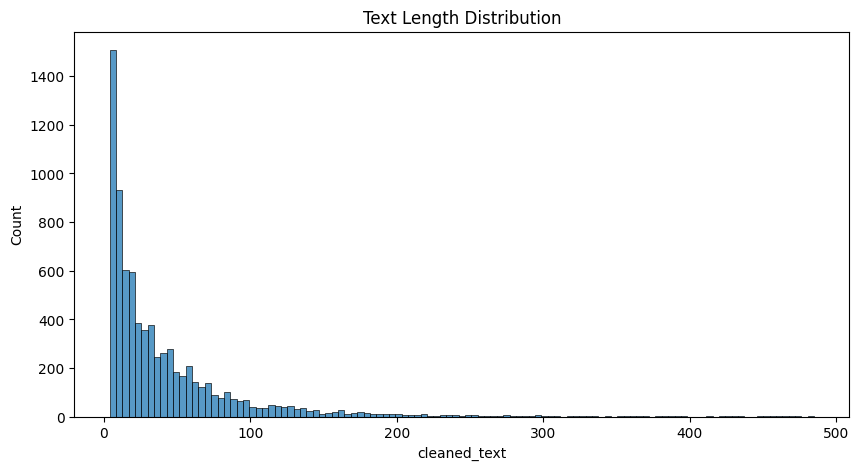

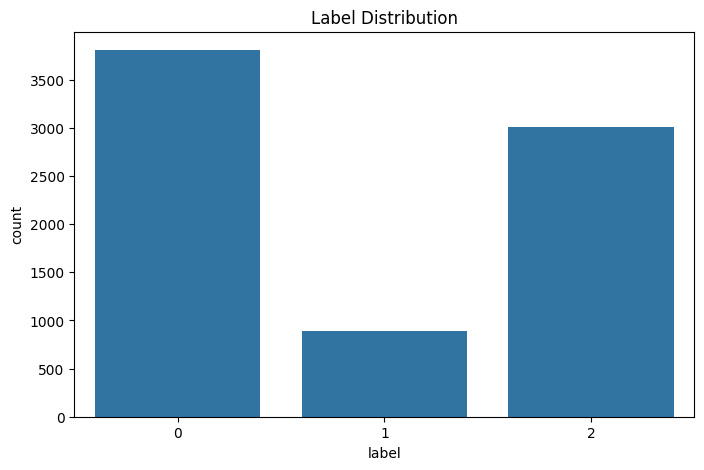

In [4]:
# Ph√¢n t√≠ch ƒë·ªô d√†i vƒÉn b·∫£n
plt.figure(figsize=(10, 5))
text_lengths = processed_df['cleaned_text'].str.len()
sns.histplot(text_lengths)
plt.title('Text Length Distribution')
plt.show()

# Ph√¢n t√≠ch ph√¢n ph·ªëi nh√£n
plt.figure(figsize=(8, 5))
sns.countplot(data=processed_df, x='label')
plt.title('Label Distribution')
plt.show()

## 4. Feature Engineering

In [5]:
# Extract features
X_train_features = feature_extractor.extract_features(X_train)
X_test_features = feature_extractor.extract_features(X_test)

print("Feature shapes:")
print(f"Training features: {X_train_features.shape}")
print(f"Testing features: {X_test_features.shape}")

Word features shape: (5390, 2000)
Char features shape: (5390, 500)
Tfidf features shape: (5390, 2000)
Linguistic features shape: (5390, 6)
Emotion features shape: (5390, 15)
All features shape after hstack: (5390, 4521)
Word features shape: (2310, 2000)
Char features shape: (2310, 500)
Tfidf features shape: (2310, 2000)
Linguistic features shape: (2310, 6)
Emotion features shape: (2310, 15)
All features shape after hstack: (2310, 4521)
Feature shapes:
Training features: (5390, 4521)
Testing features: (2310, 4521)


## 5. Training Model

In [6]:
# Train models
models = model_trainer.train_with_grid_search(X_train, y_train)

# Check if models is not None
if models:
    # Get best model performance
    best_model_name = max(models.items(), key=lambda x: getattr(x[1], 'best_score_', 0))[0]
    best_model = models[best_model_name]

    print(f"Best model: {best_model_name}")
    print(f"Best score: {getattr(best_model, 'best_score_', 0):.4f}")
else:
    print("No models were trained.")

2024-11-20 12:52:57,614 - src.models.model_trainer - INFO - Starting model training...
Loaded feature extractor with None dimensions
Word features shape: (5390, 2000)
Char features shape: (5390, 500)
Tfidf features shape: (5390, 2000)
Linguistic features shape: (5390, 6)
Emotion features shape: (5390, 15)
All features shape after hstack: (5390, 4521)
Word features shape: (5390, 2000)
Char features shape: (5390, 500)
Tfidf features shape: (5390, 2000)
Linguistic features shape: (5390, 6)
Emotion features shape: (5390, 15)
All features shape after hstack: (5390, 4521)
2024-11-20 12:52:59,706 - src.models.model_trainer - INFO - 
Training rf model...
2024-11-20 12:53:10,543 - src.models.model_trainer - INFO - Fold 1/5 - Train: 0.6555, Val: 0.6651
2024-11-20 12:53:21,029 - src.models.model_trainer - INFO - Fold 2/5 - Train: 0.6539, Val: 0.6437
2024-11-20 12:53:31,460 - src.models.model_trainer - INFO - Fold 3/5 - Train: 0.6589, Val: 0.6416
2024-11-20 12:53:42,375 - src.models.model_trainer 

## 6. ƒê√°nh gi√° Model

Loaded feature extractor with None dimensions
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1142
           1       0.23      0.26      0.24       266
           2       0.81      0.71      0.76       902

    accuracy                           0.70      2310
   macro avg       0.60      0.59      0.59      2310
weighted avg       0.71      0.70      0.70      2310



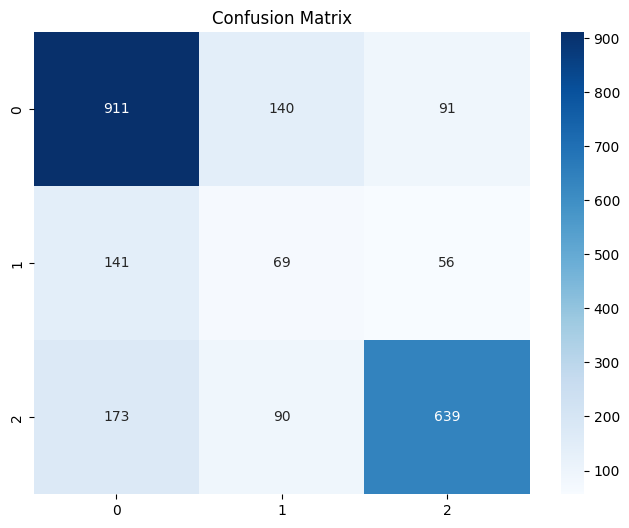

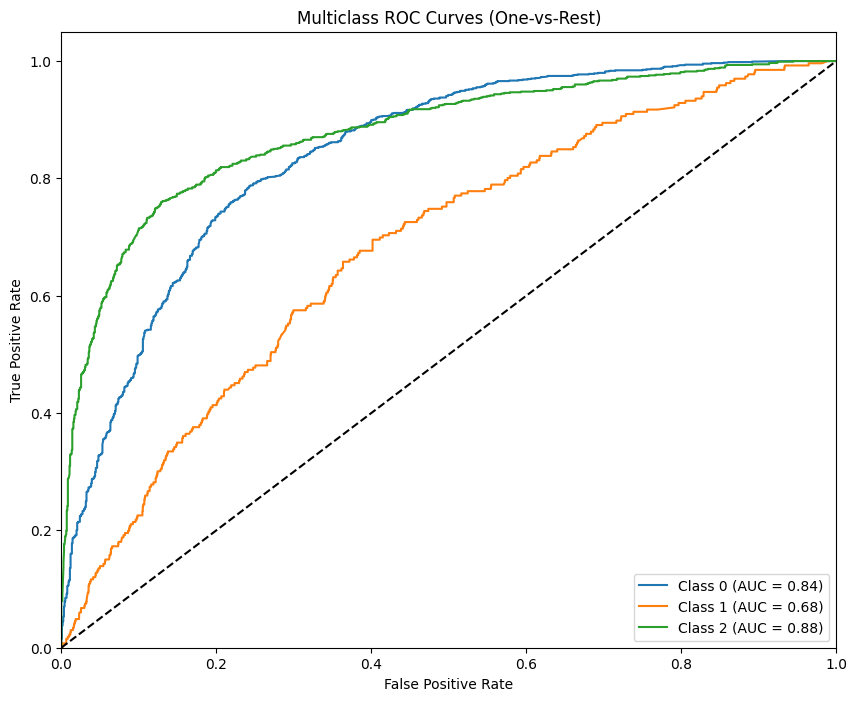

In [7]:
# Initialize predictor
predictor = SentimentPredictor(language, config)

# Make predictions
predictions = predictor.predict(X_test_features)
probabilities = predictor.predict_proba(X_test_features)

# Modified evaluation code to handle multiclass
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

# Basic metrics
results = {
    'classification_report': classification_report(y_test, predictions),
    'confusion_matrix': confusion_matrix(y_test, predictions)
}

# Display results
print("Classification Report:")
print(results['classification_report'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curves for each class
n_classes = probabilities.shape[1]
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    # Convert to one-vs-rest binary format
    y_test_binary = (y_test == i).astype(int)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_binary, probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

## 7. Th·ª≠ nghi·ªám Model

In [8]:
# Test with sample texts
test_texts = [
    "S·∫£n ph·∫©m r·∫•t t·ªët, t√¥i r·∫•t th√≠ch",
    "Ch·∫•t l∆∞·ª£ng k√©m, kh√¥ng ƒë√°ng ti·ªÅn",
    "T·∫°m ƒë∆∞·ª£c, kh√¥ng t·ªët kh√¥ng x·∫•u"
]

# Process and predict
for text in test_texts:
    # Preprocess
    df = pd.DataFrame({'text': [text]})
    processed = preprocessor.preprocess(df)
    
    # Extract features
    features = feature_extractor.extract_features(processed['cleaned_text'])
    
    # Get prediction with emotion
    result = predictor.predict_emotion(features, text)
    
    # Display results
    print(f"\nText: {text}")
    print(f"Sentiment: {result['sentiment']}")
    print(f"Confidence: {result['sentiment_confidence']:.4f}")
    print(f"Emotion: {result['emotion']} ({result['emotion_vi']}) {result['emotion_emoji']}")

2024-11-20 12:54:16,142 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-20 12:54:16,145 - src.data.preprocessor - INFO - Preprocessed 1 valid samples
Word features shape: (1, 2000)
Char features shape: (1, 500)
Tfidf features shape: (1, 2000)
Linguistic features shape: (1, 6)
Emotion features shape: (1, 15)
All features shape after hstack: (1, 4521)

Text: S·∫£n ph·∫©m r·∫•t t·ªët, t√¥i r·∫•t th√≠ch
Sentiment: 2
Confidence: 0.7572
Emotion: happy (vui v·∫ª) üòä
2024-11-20 12:54:16,170 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-20 12:54:16,173 - src.data.preprocessor - INFO - Preprocessed 1 valid samples
Word features shape: (1, 2000)
Char features shape: (1, 500)
Tfidf features shape: (1, 2000)
Linguistic features shape: (1, 6)
Emotion features shape: (1, 15)
All features shape after hstack: (1, 4521)

Text: Ch·∫•t l∆∞·ª£ng k√©m, kh√¥ng ƒë√°ng ti·ªÅn
Sentiment: 0
Confidence: 0.4446
Emotion: disappointed (th·∫•t v·ªçng) üòû
2024-11-20 12:54:16,1

## 8. Ph√¢n t√≠ch Hi·ªáu nƒÉng chi ti·∫øt

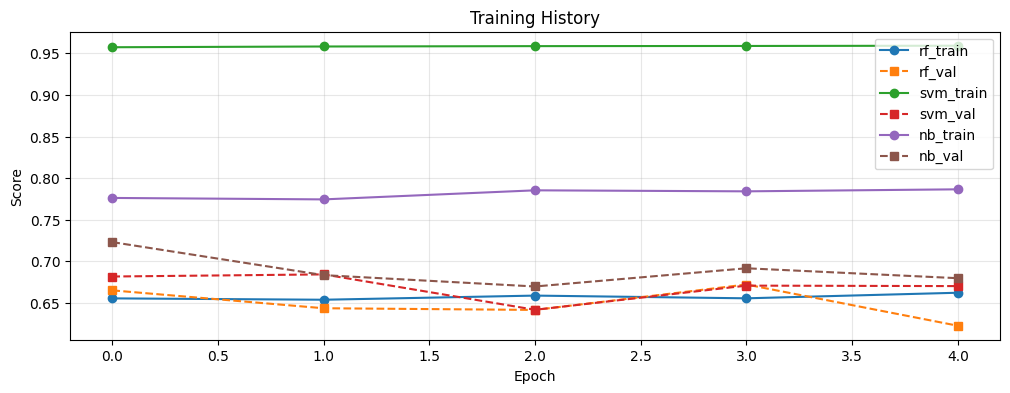

In [9]:
# L·∫•y metrics t·ª´ model_info
model_path = os.path.join(config.DATA_DIR, "models", f"{language}_sentiment_model.pkl")
model_info = joblib.load(model_path)
metrics = model_info['metrics']

# Hi·ªÉn th·ªã training history
if 'training_history' in metrics:
    plt.figure(figsize=(12, 4))
    for model_name, history in metrics['training_history'].items():
        plt.plot(history['train_scores'], 'o-', label=f'{model_name}_train')
        plt.plot(history['valid_scores'], 's--', label=f'{model_name}_val')
    
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Hi·ªÉn th·ªã feature importance n·∫øu c√≥
if models and 'rf' in models and hasattr(models['rf'], 'feature_importances_'):
    importances = models['rf'].feature_importances_
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(importances)), importances)
    plt.title('Feature Importance')
    plt.show()